In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
import math
from collections import Counter

In [2]:
curdir = "final_dataset/at&t/"
X = np.zeros((320, 10304))
Y = np.zeros(320)
#testing purposes###############
Xtest = np.zeros((80, 10304))
Ytest = np.zeros(80)
####################

j = 0 ##################################
i = 0
count1 = 0
count2 = []
avgFaces = []
for subdir in os.listdir(curdir):
    person = os.path.join(curdir,subdir)
    count = 0
    avgFace = []
    for imagefile in os.listdir(person):
        #checking if imagefile, also removing ambient image
        if(imagefile.endswith(".pgm")):
            # print(imagefile)
            count +=1
            if count<9:
                #image location
                imageloc = os.path.join(person, imagefile)
                #loaded image
                image = plt.imread(imageloc)

                #which person is loaded in, not used yet
                curperson = int(subdir[1:])
                # print(subdir)
                # print(curperson)
                X[i,:] = image.flatten()
                avgFace.append(X[i,:])
                Y[i] = curperson
                i+=1
            if count>=9:
                #image location
                imageloc = os.path.join(person, imagefile)
                #loaded image
                image = plt.imread(imageloc)

                #which person is loaded in, not used yet
                curperson = int(subdir[1:])
                # print(subdir)
                # print(curperson)
                Xtest[j,:] = image.flatten()
                # avgFace.append(X[i,:])
                Ytest[j] = curperson
                j+=1
    avgFace = np.sum(np.array(avgFace),axis = 0)/count
    avgFaces.append((avgFace,curperson))
    count2.append(count)
    count1 += count
    # print(count)
print(count1)

400


In [3]:
len(X)

320

In [4]:
print(count2)

[10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10]


In [5]:
print(Y)

[15. 15. 15. 15. 15. 15. 15. 15. 38. 38. 38. 38. 38. 38. 38. 38.  3.  3.
  3.  3.  3.  3.  3.  3. 11. 11. 11. 11. 11. 11. 11. 11. 30. 30. 30. 30.
 30. 30. 30. 30. 18. 18. 18. 18. 18. 18. 18. 18. 32. 32. 32. 32. 32. 32.
 32. 32. 10. 10. 10. 10. 10. 10. 10. 10. 21. 21. 21. 21. 21. 21. 21. 21.
  2.  2.  2.  2.  2.  2.  2.  2. 25. 25. 25. 25. 25. 25. 25. 25. 34. 34.
 34. 34. 34. 34. 34. 34.  9.  9.  9.  9.  9.  9.  9.  9. 28. 28. 28. 28.
 28. 28. 28. 28. 40. 40. 40. 40. 40. 40. 40. 40. 22. 22. 22. 22. 22. 22.
 22. 22. 12. 12. 12. 12. 12. 12. 12. 12.  7.  7.  7.  7.  7.  7.  7.  7.
 24. 24. 24. 24. 24. 24. 24. 24. 16. 16. 16. 16. 16. 16. 16. 16. 36. 36.
 36. 36. 36. 36. 36. 36. 39. 39. 39. 39. 39. 39. 39. 39. 33. 33. 33. 33.
 33. 33. 33. 33.  8.  8.  8.  8.  8.  8.  8.  8. 27. 27. 27. 27. 27. 27.
 27. 27. 35. 35. 35. 35. 35. 35. 35. 35.  6.  6.  6.  6.  6.  6.  6.  6.
 14. 14. 14. 14. 14. 14. 14. 14. 23. 23. 23. 23. 23. 23. 23. 23. 17. 17.
 17. 17. 17. 17. 17. 17. 20. 20. 20. 20. 20. 20. 20

(320, 10304)


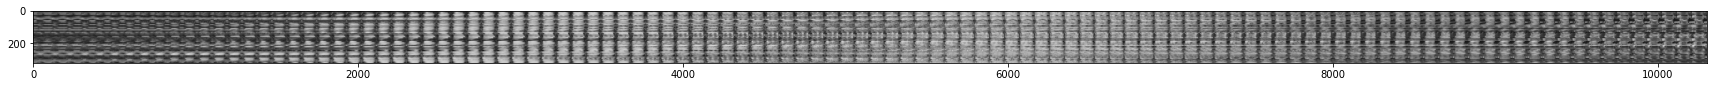

In [6]:
plt.figure(figsize=(30,30))
plt.imshow(X,cmap='gray')
print(X.shape)

112 92


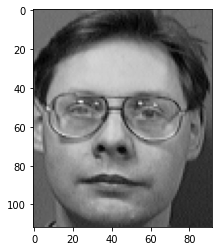

In [7]:
img = plt.imread(imageloc)
h,w = img.shape
plt.imshow(img,cmap='gray')
print(h,w)

In [8]:
aV = np.zeros((41, 10304))
for i in range(len(avgFaces)):
    aV[avgFaces[i][1]] = avgFaces[i][0]

In [9]:
indices = np.argsort(Y)
print(indices)
Ytrain = Y[indices]
print(Ytrain)
Xtrain = X[indices,:]
print((Xtrain))

[256 257 258 259 260 261 262 263  76  73  74  75  72  77  78  79  16  17
  18  19  20  21  22  23 319 314 318 312 313 317 315 316 250 251 252 253
 254 255 248 249 214 213 212 211 210 209 208 215 136 138 139 140 141 142
 143 137 184 185 186 187 188 189 190 191  97  96 103 102 101 100  99  98
  56  57  58  59  60  62  61  63  31  25  26  27  28  29  30  24 129 135
 134 133 132 131 130 128 270 269 268 267 266 265 264 271 223 216 217 218
 219 220 221 222   0   1   2   3   4   5   6   7 159 156 155 154 153 152
 157 158 237 236 235 234 233 232 238 239  40  41  42  46  44  45  47  43
 295 294 292 293 290 289 288 291 240 241 242 243 244 245 246 247  71  70
  64  65  66  67  68  69 127 126 125 124 123 122 121 120 224 225 226 227
 228 229 230 231 151 144 145 146 147 148 149 150  87  86  85  80  81  82
  83  84 309 306 310 311 308 307 304 305 197 192 193 194 199 198 195 196
 104 110 106 107 108 111 109 105 275 278 279 277 276 274 272 273  39  38
  33  35  36  37  32  34 280 281 282 283 284 285 28

In [10]:
u, ind = np.unique(Y,return_inverse=True)

In [11]:
print(ind)

[14 14 14 14 14 14 14 14 37 37 37 37 37 37 37 37  2  2  2  2  2  2  2  2
 10 10 10 10 10 10 10 10 29 29 29 29 29 29 29 29 17 17 17 17 17 17 17 17
 31 31 31 31 31 31 31 31  9  9  9  9  9  9  9  9 20 20 20 20 20 20 20 20
  1  1  1  1  1  1  1  1 24 24 24 24 24 24 24 24 33 33 33 33 33 33 33 33
  8  8  8  8  8  8  8  8 27 27 27 27 27 27 27 27 39 39 39 39 39 39 39 39
 21 21 21 21 21 21 21 21 11 11 11 11 11 11 11 11  6  6  6  6  6  6  6  6
 23 23 23 23 23 23 23 23 15 15 15 15 15 15 15 15 35 35 35 35 35 35 35 35
 38 38 38 38 38 38 38 38 32 32 32 32 32 32 32 32  7  7  7  7  7  7  7  7
 26 26 26 26 26 26 26 26 34 34 34 34 34 34 34 34  5  5  5  5  5  5  5  5
 13 13 13 13 13 13 13 13 22 22 22 22 22 22 22 22 16 16 16 16 16 16 16 16
 19 19 19 19 19 19 19 19  4  4  4  4  4  4  4  4  0  0  0  0  0  0  0  0
 12 12 12 12 12 12 12 12 28 28 28 28 28 28 28 28 30 30 30 30 30 30 30 30
 18 18 18 18 18 18 18 18 36 36 36 36 36 36 36 36 25 25 25 25 25 25 25 25
  3  3  3  3  3  3  3  3]


In [12]:
X_t = Xtrain

In [13]:
A = X_t.T
mean_imgs = np.reshape(A.mean(axis = 1),(10304,1))
A = A - mean_imgs

In [14]:
print(A.shape)
print(A.mean(axis = 1).shape)
print(aV.shape)

(10304, 320)
(10304,)
(41, 10304)


In [15]:
#Average image
aV = aV - mean_imgs.T

In [16]:
#we use A.T @ A and not A @ A.T for lesser computational complexity
U,D,Vt = np.linalg.svd(A.T @ A)
V = Vt.T
evects = A @ V
norm = np.linalg.norm(evects,axis=0)
evects = evects / norm

In [17]:
#Eigenvectors
print(evects)
print(evects.shape)

[[ 0.00178743 -0.01471928 -0.01916563 ...  0.00402428  0.0032839
   0.0012171 ]
 [ 0.00184279 -0.01470516 -0.0193155  ...  0.00076216 -0.00160556
   0.        ]
 [ 0.00184173 -0.01463199 -0.01911261 ... -0.00159063 -0.00140237
  -0.00194736]
 ...
 [ 0.00688178  0.00988015 -0.0146758  ...  0.00061517  0.01186452
  -0.00973679]
 [ 0.0062461   0.00948435 -0.01471559 ...  0.0061107   0.01028749
  -0.03213141]
 [ 0.00740557  0.00906273 -0.015127   ...  0.01232828  0.00966354
  -0.01752622]]
(10304, 320)


In [18]:
def reducedA(k,eV,A):
    Areduced = (eV[:,:k].T @ A)
    Arecovered = (eV[:,:k] @ Areduced)
    return Arecovered

In [19]:
A1 = reducedA(5,evects,A)
A2 = reducedA(10,evects,A)

In [20]:
A3 = reducedA(100,evects,A)
A4 = reducedA(1000,evects,A)

3 examples of reconstruction using different number of eigenfaces taken


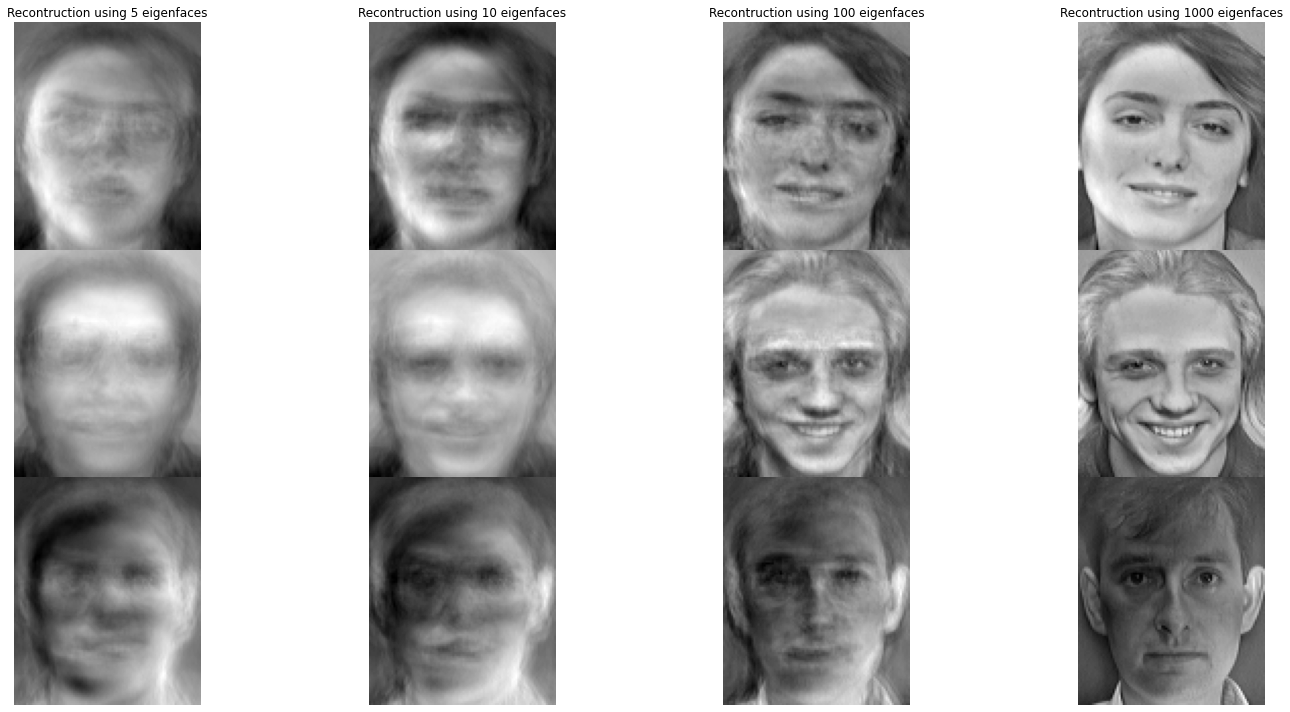

In [21]:
print("3 examples of reconstruction using different number of eigenfaces taken")
fig = plt.figure(figsize=(20, 10))
fig.add_subplot(3, 4, 1)
plt.imshow(A1[:,60].reshape((h,w)),cmap = 'gray')
plt.title("Recontruction using 5 eigenfaces")
plt.axis("off")
fig.add_subplot(3, 4, 2)
plt.imshow(A2[:,60].reshape((h,w)),cmap = 'gray')
plt.title("Recontruction using 10 eigenfaces")
plt.axis("off")
plt.tight_layout()
fig.add_subplot(3, 4, 3)
plt.imshow(A3[:,60].reshape((h,w)),cmap = 'gray')
plt.title("Recontruction using 100 eigenfaces")
plt.axis("off")
fig.add_subplot(3, 4, 4)
plt.imshow(A4[:,60].reshape((h,w)),cmap = 'gray')
plt.title("Recontruction using 1000 eigenfaces")
plt.axis("off")
plt.tight_layout()
fig.add_subplot(3, 4, 5)
plt.imshow(A1[:,90].reshape((h,w)),cmap = 'gray')
plt.axis("off")
fig.add_subplot(3, 4, 6)
plt.imshow(A2[:,90].reshape((h,w)),cmap = 'gray')
plt.axis("off")
plt.tight_layout()
fig.add_subplot(3, 4, 7)
plt.imshow(A3[:,90].reshape((h,w)),cmap = 'gray')
plt.axis("off")
fig.add_subplot(3, 4, 8)
plt.imshow(A4[:,90].reshape((h,w)),cmap = 'gray')
plt.axis("off")
plt.tight_layout()
fig.add_subplot(3, 4, 9)
plt.imshow(A1[:,190].reshape((h,w)),cmap = 'gray')
plt.axis("off")
fig.add_subplot(3, 4, 10)
plt.imshow(A2[:,190].reshape((h,w)),cmap = 'gray')
plt.axis("off")
plt.tight_layout()
fig.add_subplot(3, 4, 11)
plt.imshow(A3[:,190].reshape((h,w)),cmap = 'gray')
plt.axis("off")
fig.add_subplot(3, 4, 12)
plt.imshow(A4[:,190].reshape((h,w)),cmap = 'gray')
plt.axis("off")
plt.subplots_adjust(wspace=0, hspace=0)
plt.axis("off")
plt.show()

In [22]:
def which_trained_face(test_img, espace, mean_face, X_train,Y_train):
    smallest_norm = None
    person = None
    
    out = None
    test_img = np.reshape(test_img,(10304, 1))
    test_img = test_img - mean_face
    
    for i in range(X_train.shape[0]):
        cur_img = np.reshape(X_train[i],(10304, 1)) - mean_face
        reduced_img = (espace.T @ cur_img)
        test_img_espace = espace.T @ test_img

        compare = reduced_img - test_img_espace
        norm = np.linalg.norm(compare)

        if smallest_norm == None:
            smallest_norm = norm
            person = Y_train[i]
        if smallest_norm > norm:
            smallest_norm = norm
            person = Y_train[i]
            out = cur_img
    return smallest_norm,person,out

In [23]:
def which_face_from_training(test_img, espace, mean_face, X_train,Y_train,actual):
    smallest_norm = None
    person = None
    
    out = None
    test_img = np.reshape(test_img,(10304, 1))
    test_img = test_img - mean_face
    
    for i in range(X_train.shape[0]):
        if i!=actual:
            cur_img = np.reshape(X_train[i],(10304, 1)) - mean_face
            reduced_img = (espace.T @ cur_img)
            test_img_espace = espace.T @ test_img

            compare = reduced_img - test_img_espace
            norm = np.linalg.norm(compare)

            if smallest_norm == None:
                smallest_norm = norm
                person = Y_train[i]
            if smallest_norm > norm:
                smallest_norm = norm
                person = Y_train[i]
                out = cur_img
    return smallest_norm,person,out

In [24]:
c1 = 0
for i in range(len(Xtest)):
    sN1,per1,out1 = which_trained_face(Xtest[i], evects[:,0:10], mean_imgs, Xtrain,Ytrain)
    if Ytest[i] == per1:
        print(f"CORRECT GUESS for i={i}")
        c1 +=1
    else:
        print(f"WRONG GUESS for i={i}")
c1 = (c1/len(Xtest))*100

CORRECT GUESS for i=0
CORRECT GUESS for i=1
CORRECT GUESS for i=2
CORRECT GUESS for i=3
CORRECT GUESS for i=4
CORRECT GUESS for i=5
CORRECT GUESS for i=6
CORRECT GUESS for i=7
CORRECT GUESS for i=8
CORRECT GUESS for i=9
CORRECT GUESS for i=10
CORRECT GUESS for i=11
CORRECT GUESS for i=12
CORRECT GUESS for i=13
CORRECT GUESS for i=14
CORRECT GUESS for i=15
CORRECT GUESS for i=16
CORRECT GUESS for i=17
CORRECT GUESS for i=18
CORRECT GUESS for i=19
WRONG GUESS for i=20
CORRECT GUESS for i=21
CORRECT GUESS for i=22
CORRECT GUESS for i=23
CORRECT GUESS for i=24
CORRECT GUESS for i=25
WRONG GUESS for i=26
CORRECT GUESS for i=27
CORRECT GUESS for i=28
CORRECT GUESS for i=29
CORRECT GUESS for i=30
CORRECT GUESS for i=31
CORRECT GUESS for i=32
CORRECT GUESS for i=33
CORRECT GUESS for i=34
CORRECT GUESS for i=35
CORRECT GUESS for i=36
CORRECT GUESS for i=37
CORRECT GUESS for i=38
CORRECT GUESS for i=39
CORRECT GUESS for i=40
CORRECT GUESS for i=41
CORRECT GUESS for i=42
CORRECT GUESS for i=43
CO

In [25]:
print(f"Final accuracy of test images = {c1}%")

Final accuracy of test images = 95.0%


## Print Correct Guesses

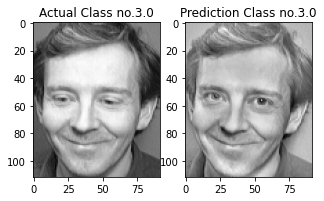

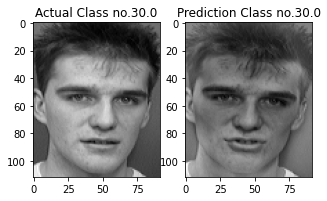

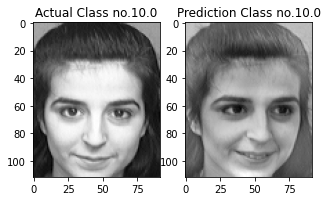

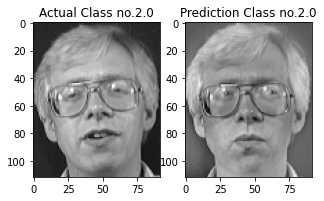

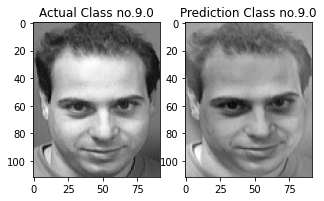

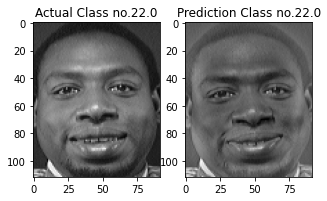

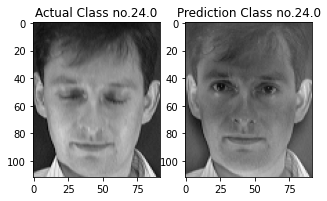

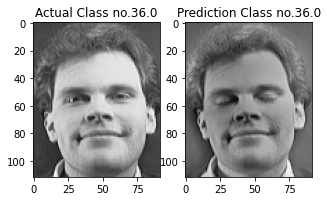

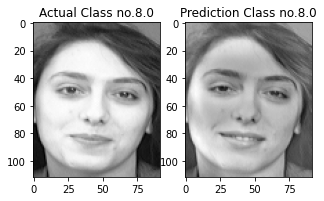

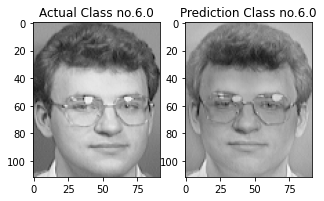

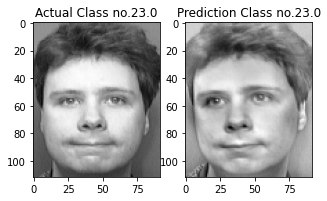

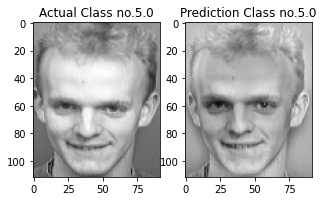

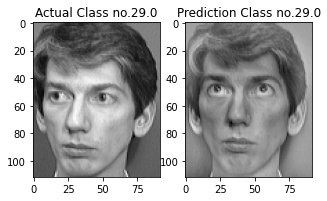

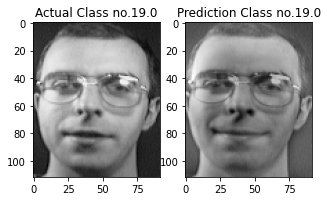

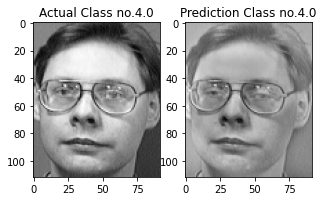

In [26]:
#Printing few correct guesses out of the total
flag = 0
for i in range(len(Xtest)):
    sN1,per1,out1 = which_trained_face(Xtest[i], evects[:,0:10], mean_imgs, Xtrain,Ytrain)
    if Ytest[i] == per1:
        flag +=1 
        if flag ==5: 
            flag = 0
            # print(f"CORRECT GUESS for i={i}")
            fig = plt.figure(figsize=(5, 40))
            fig.add_subplot(1, 2, 1)
            plt.imshow(Xtest[i].reshape((h,w)),cmap='gray')
            plt.title(f"Actual Class no.{Ytest[i]}")
            fig.add_subplot(1, 2, 2)
            plt.imshow(out1.reshape((h,w)),cmap='gray')
            plt.title(f"Prediction Class no.{per1}")

## Incorrect Guesses

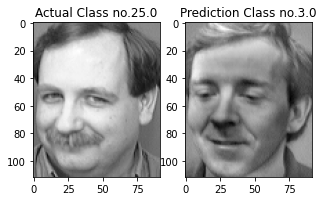

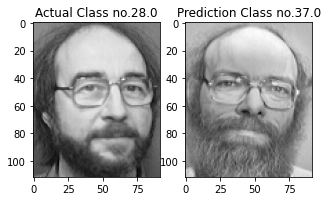

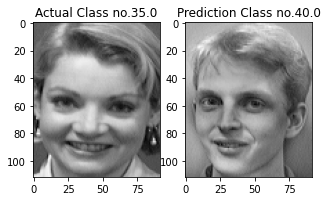

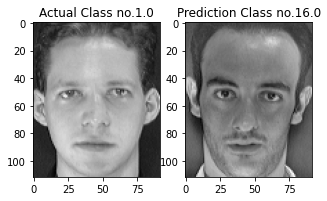

In [27]:
#Printing inorrect guesses out of the total
for i in range(len(Xtest)):
    sN1,per1,out1 = which_trained_face(Xtest[i], evects[:,0:10], mean_imgs, Xtrain,Ytrain)
    if Ytest[i] != per1:
        # print(f"CORRECT GUESS for i={i}")
        fig = plt.figure(figsize=(5, 40))
        fig.add_subplot(1, 2, 1)
        plt.imshow(Xtest[i].reshape((h,w)),cmap='gray')
        plt.title(f"Actual Class no.{Ytest[i]}")
        fig.add_subplot(1, 2, 2)
        plt.imshow(out1.reshape((h,w)),cmap='gray')
        plt.title(f"Prediction Class no.{per1}")

## Check guess class for any images [0-400) within the training class

Change vall to an number between 0 and 320 to observe prediction of a training set image

Text(0.5, 1.0, 'Prediction Class no.12.0')

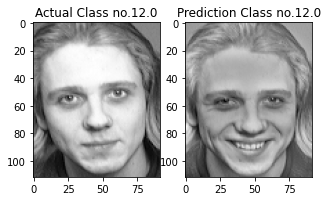

In [28]:
vall = 93
sN1,per1,out1 = which_face_from_training(Xtrain[vall], evects[:,0:10], mean_imgs, Xtrain,Ytrain,vall)
fig = plt.figure(figsize=(5, 40))
fig.add_subplot(1, 2, 1)
plt.imshow(Xtrain[vall].reshape((h,w)),cmap='gray')
plt.title(f"Actual Class no.{Ytrain[vall]}")
fig.add_subplot(1, 2, 2)
plt.imshow(out1.reshape((h,w)),cmap='gray')
plt.title(f"Prediction Class no.{per1}")

Text(0.5, 1.0, 'Prediction Class no.28.0')

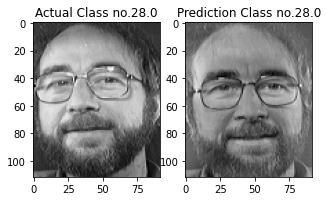

In [29]:
vall = 221
sN1,per1,out1 = which_face_from_training(Xtrain[vall], evects[:,0:10], mean_imgs, Xtrain,Ytrain,vall)
fig = plt.figure(figsize=(5, 40))
fig.add_subplot(1, 2, 1)
plt.imshow(Xtrain[vall].reshape((h,w)),cmap='gray')
plt.title(f"Actual Class no.{Ytrain[vall]}")
fig.add_subplot(1, 2, 2)
plt.imshow(out1.reshape((h,w)),cmap='gray')
plt.title(f"Prediction Class no.{per1}")